In [1]:
import quandl
import yfinance as yf
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr
import seaborn as sns
import plotly 
import cufflinks as cf
from yahoofinance import IncomeStatement
from nsepy import get_history
from datetime import date

%matplotlib inline

sns.set_style('whitegrid')

In [2]:
#Timestamp to get Stock Data

start = pd.Timestamp('2014-01-01')
end = pd.Timestamp('2024-01-01')


# YAHOO FINANCE API CALLOUT

In [3]:
hdfc= yf.download('HDFCBANK.NS', start=start, end=end)
icici=yf.download('ICICIBANK.NS', start=start, end=end)
axis=yf.download('AXISBANK.NS', start=start, end=end)
sbi=yf.download('SBIN.NS', start=start, end=end)
kotak=yf.download('KOTAKBANK.NS', start=start, end=end)
pnb=yf.download('PNB.NS', start=start, end=end)
bob=yf.download('BANKBARODA.NS',start=start, end=end)
induslnd=yf.download('INDUSINDBK.NS',start=start, end=end)
bergerpaint=yf.download('BERGEPAINT.NS', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
tickers=['HDFCBANK','ICICIBANK','AXISBANK','SBIN','KOTAKBANK','PNB','BANKBARODA','INDUSINDBK','BERGERPAINT']

# DATAFRAME CONCATENATE

In [5]:
#combing DataFrame objects into single DataFrame

bank_stocks=pd.concat([hdfc,icici,axis,sbi,kotak,pnb,bob,induslnd,bergerpaint], axis=1, keys=tickers)
bank_stocks.head()

HDFCBANK                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2014-01-01  334.000000  334.899994  331.500000  332.575012  305.065735   
2014-01-02  332.500000  337.375000  326.774994  328.500000  301.327789   
2014-01-03  326.000000  333.000000  325.000000  331.549988  304.125488   
2014-01-06  331.500000  331.500000  328.500000  330.850006  303.483429   
2014-01-07  333.549988  335.475006  326.649994  332.200012  304.721710   

                      ICICIBANK                                      ...  \
             Volume        Open        High         Low       Close  ...   
Date                                                                 ...   
2014-01-01  2246218  200.163635  201.100006  198.545456  199.581818  ...   
2014-01-02  3614496  199.300003  203.272720  194.563629  195.563629  ...   
2014-01-03  3256592  194.181824  195.454544  190.000000  193.963638  ...   
2014-01-06  2981710  193.818176  194.363632  188.190903  189.236359  ...   
2014-01-07  3948460  190.009094  192.581818  186.154541  190.909088  ...   

            INDUSINDBK                                  BERGERPAINT  \
                   Low       Close   Adj Close   Volume        Open   
Date                                                                  
2014-01-01  421.350006  423.350006  396.053406   436060   67.261902   
2014-01-02  410.600006  413.049988  386.417511  1488105   67.619049   
2014-01-03  406.600006  413.899994  387.212646  1744494   66.666664   
2014-01-06  409.100006  413.299988  386.651337  1053536   66.681549   
2014-01-07  411.000000  418.850006  391.843567  1751684   66.860123   

                                                                
                 High        Low      Close  Adj Close  Volume  
Date                                                            
2014-01-01  67.782738  66.994049  67.366074  63.312641  159724  
2014-01-02  68.928574  66.666664  66.785713  62.767204  495351  
2014-01-03  67.261902  66.071426  66.845238  62.823158  155984  
2014-01-06  67.023811  66.071426  66.383926  62.389614  127975  
2014-01-07  66.964287  65.803574  66.026787  62.053951  116524  

[5 rows x 54 columns]

# MAX CLOSE PRICE (.xs)

In [6]:
#getting maximum value of the Close Price of Each Stock using Cross Section(xs)- It allows you to select data based on the 
#labels in the index, particularly when working with MultiIndex structures.

bank_stocks.xs(key='Close', axis=1, level=1).max()

HDFCBANK       1728.199951
ICICIBANK      1037.400024
AXISBANK       1132.449951
SBIN            655.400024
KOTAKBANK      2210.949951
PNB             226.000000
BANKBARODA      232.949997
INDUSINDBK     2023.050049
BERGERPAINT     720.791687
dtype: float64

# RETURN %age CHANGE - DATAFRAME

In [7]:
#storing Return % of the stocks in the 'return' DataFrame using for-loop.

returns = pd.DataFrame()
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[(tick, 'Close')].pct_change()
returns.head()

,HDFCBANK Return,ICICIBANK Return,AXISBANK Return,SBIN Return,KOTAKBANK Return,PNB Return,BANKBARODA Return,INDUSINDBK Return,BERGERPAINT Return
Date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.012253,-0.020133,-0.015400,-0.012719,-0.020967,-0.037329,-0.011485,-0.024330,-0.008615
2014-01-03,0.009285,-0.008181,-0.008960,-0.013170,0.007280,0.011535,0.000077,0.002058,0.000891
2014-01-06,-0.002111,-0.024372,-0.003648,-0.018318,0.002175,-0.013263,-0.019389,-0.001450,-0.006901
2014-01-07,0.004080,0.008839,-0.017551,-0.015846,-0.008332,-0.012704,-0.032091,0.013429,-0.005380


In [8]:
returns.std() # to find the riskiest stock

HDFCBANK Return       0.014159
ICICIBANK Return      0.020181
AXISBANK Return       0.021385
SBIN Return           0.021415
KOTAKBANK Return      0.016832
PNB Return            0.027474
BANKBARODA Return     0.027089
INDUSINDBK Return     0.025212
BERGERPAINT Return    0.019035
dtype: float64

In [9]:
returns.idxmax() # to find the Best Single Day Gain of stock

HDFCBANK Return      2020-03-25
ICICIBANK Return     2017-10-25
AXISBANK Return      2020-04-07
SBIN Return          2017-10-25
KOTAKBANK Return     2020-10-27
PNB Return           2017-10-25
BANKBARODA Return    2017-10-25
INDUSINDBK Return    2020-03-26
BERGERPAINT Return   2014-12-01
dtype: datetime64[ns]

In [10]:
returns.idxmin() # to find the date of the Worst Drop of the stock

HDFCBANK Return      2020-03-23
ICICIBANK Return     2020-03-23
AXISBANK Return      2020-03-23
SBIN Return          2020-03-23
KOTAKBANK Return     2020-03-23
PNB Return           2022-02-24
BANKBARODA Return    2018-09-18
INDUSINDBK Return    2020-03-18
BERGERPAINT Return   2023-09-25
dtype: datetime64[ns]

# PLOT PAIRWISE - SEABORN

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



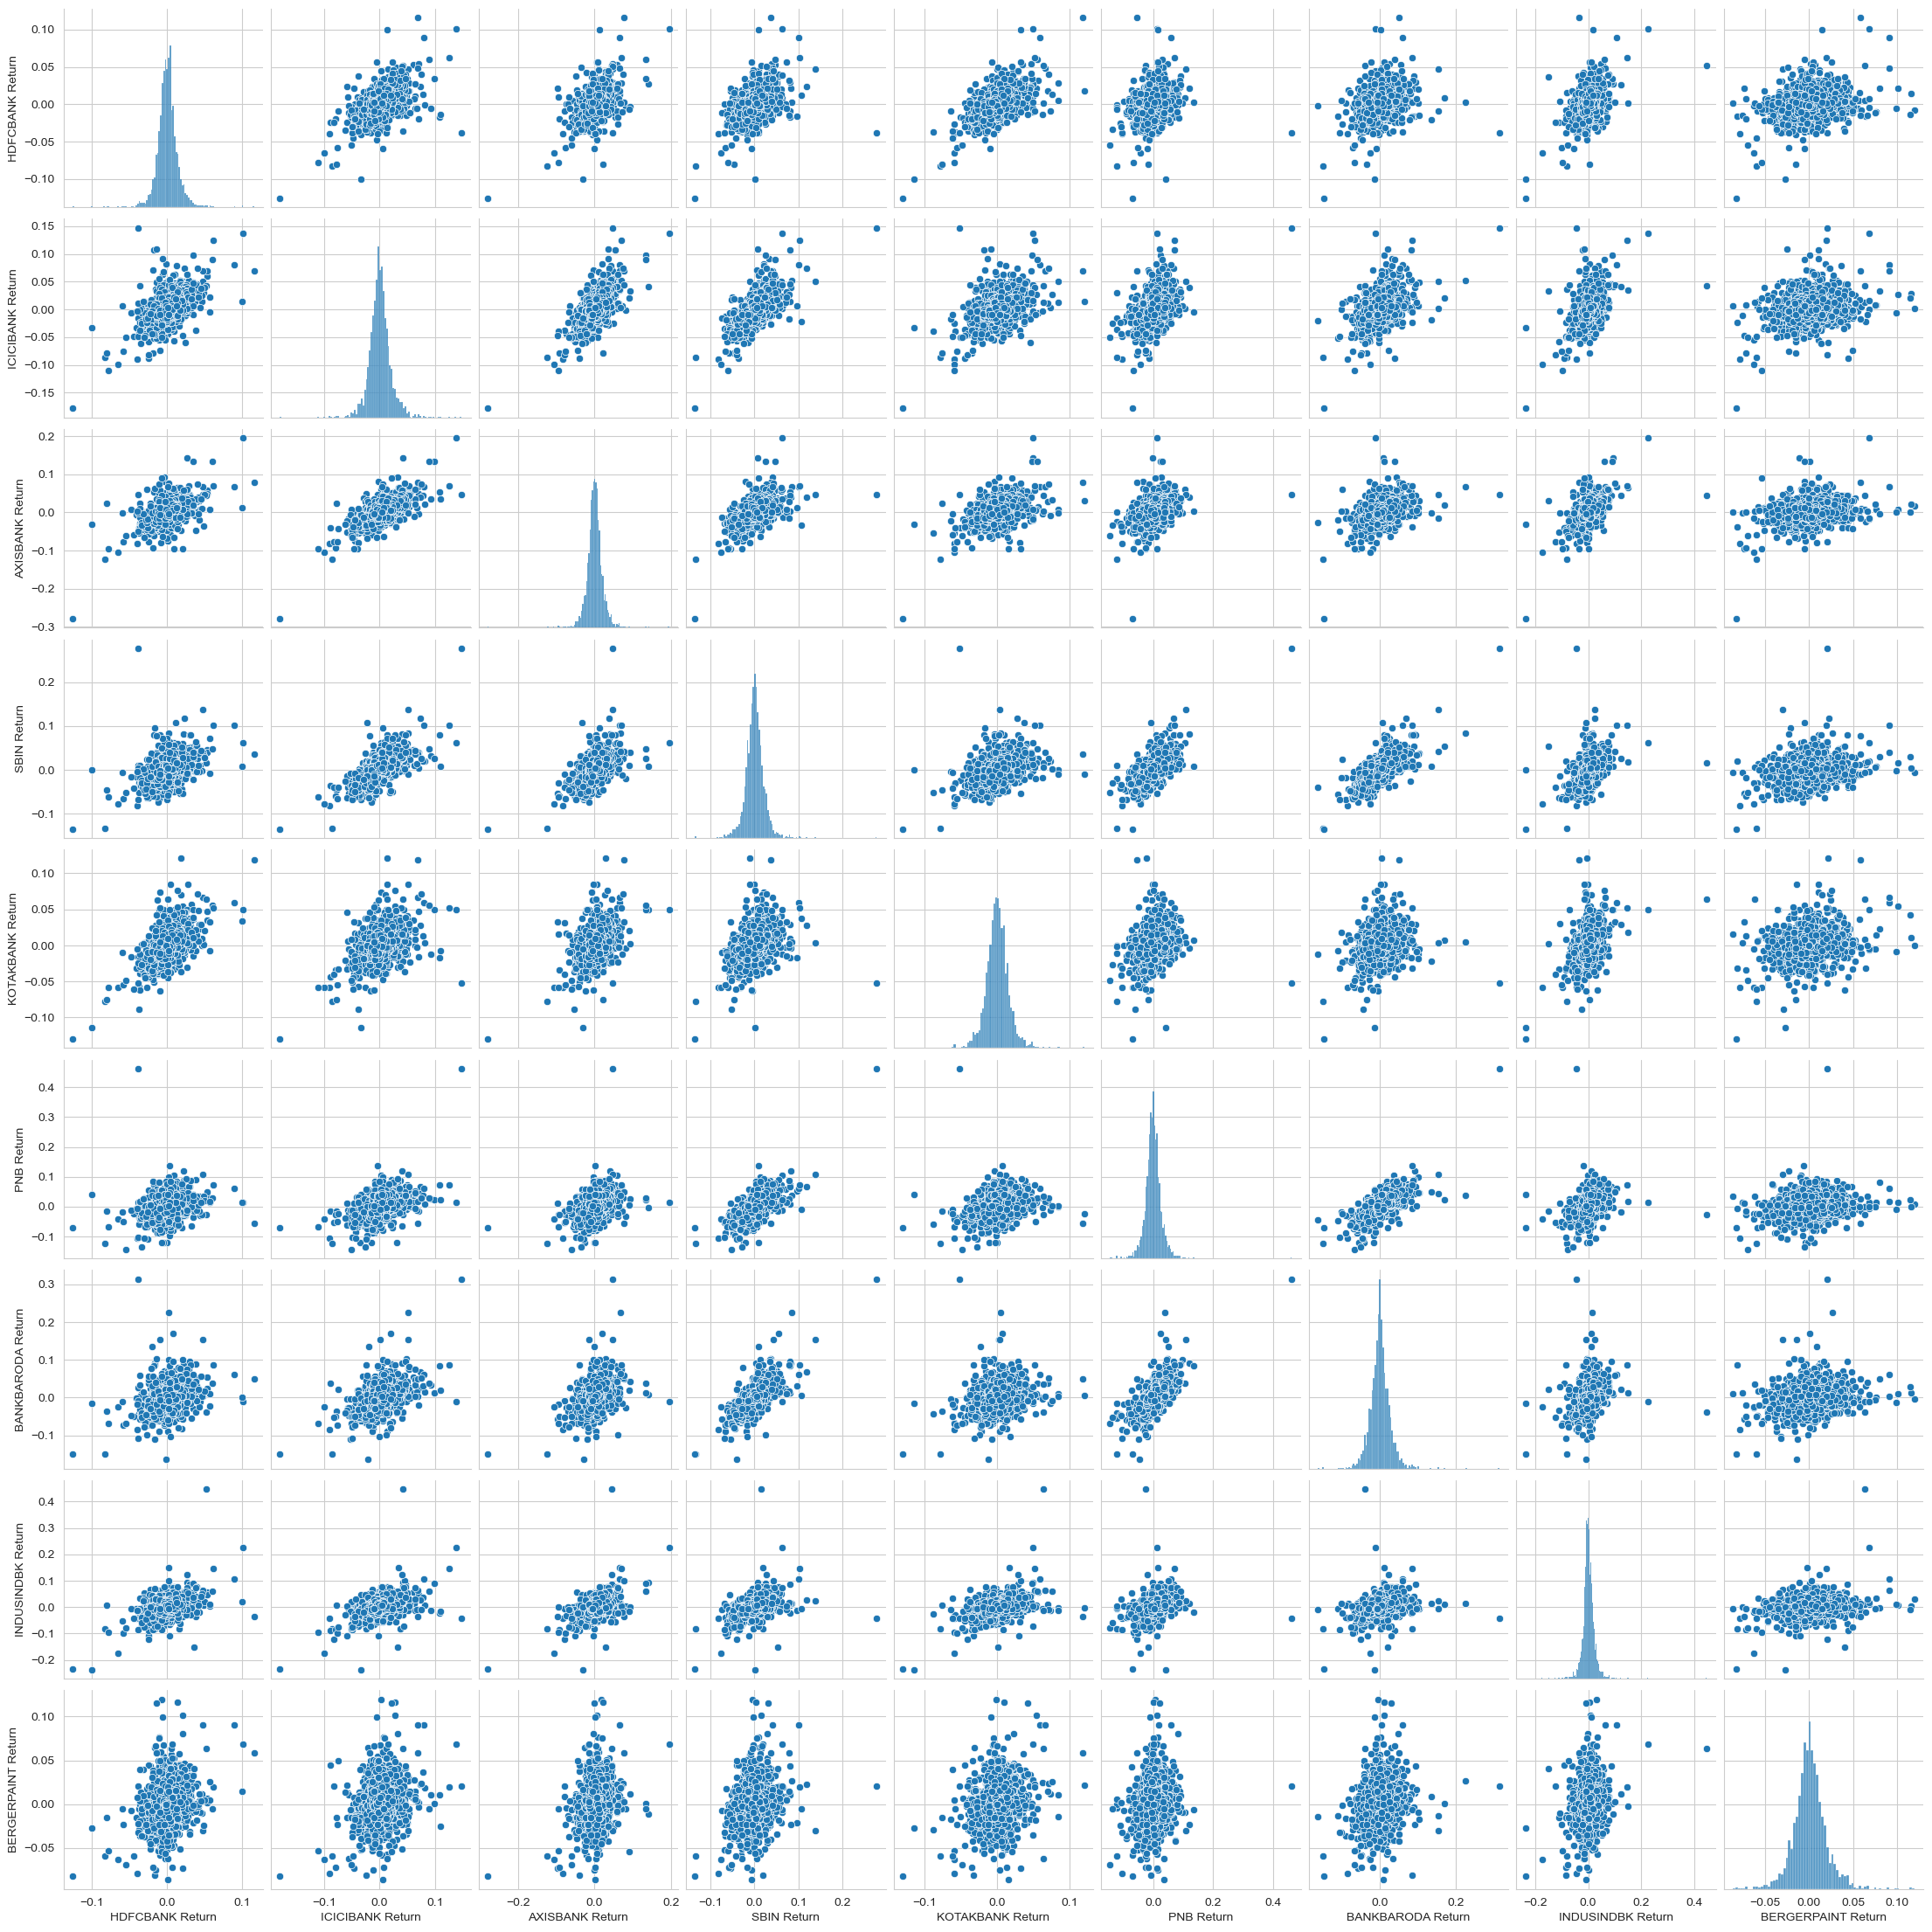

In [11]:
#using Seaborn to create a pairwise scatter plot matrix.
#returns[1:]

plt.rcParams['figure.autolayout'] = False
sns.pairplot(returns[1:])

# DISTRIBUTION PLOT

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



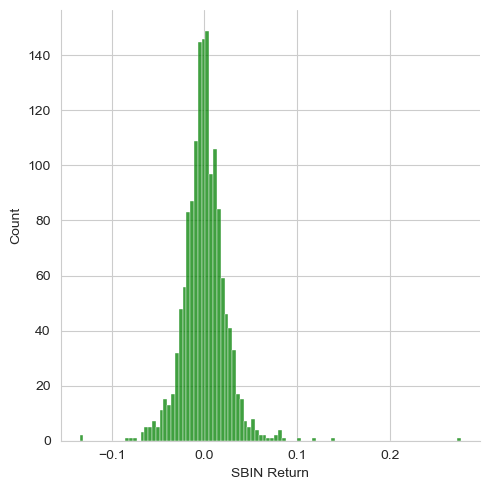

In [12]:
sns.displot(returns.loc['2015-01-01':'2020-12-31']['SBIN Return'], color='green', bins=100)

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



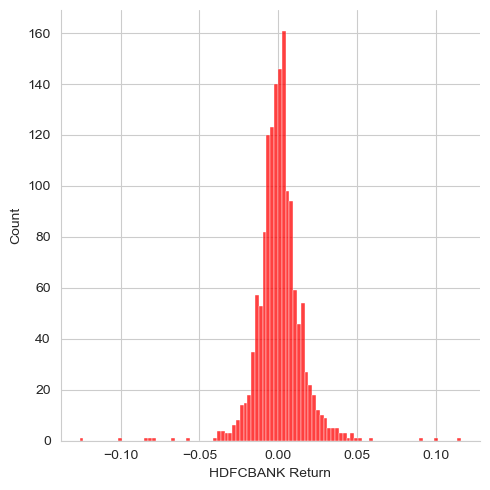

In [14]:
sns.displot(returns.loc['2015-01-01':'2020-12-31']['HDFCBANK Return'], color='red', bins=100)

In [15]:
cf.go_offline()

# LINE GRAPH

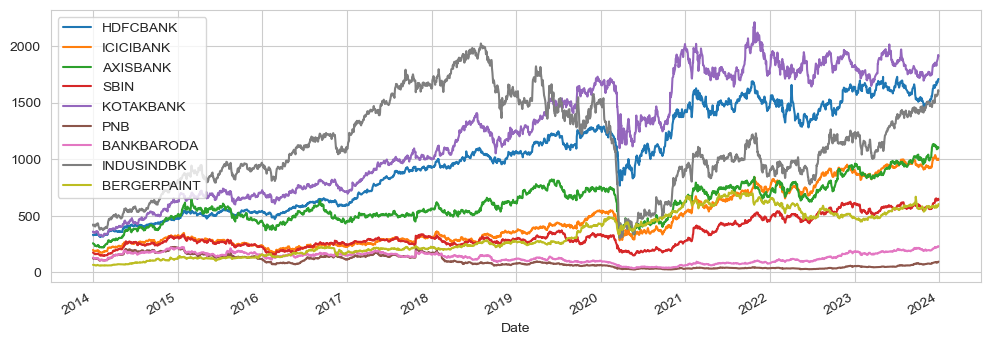

In [22]:
for tick in tickers:
    bank_stocks[(tick, 'Close')].plot(figsize=(12, 4), label=tick)
plt.legend()

# PLOT.LY

In [17]:
bank_stocks.xs(key='Close',axis=1,level=1).iplot()

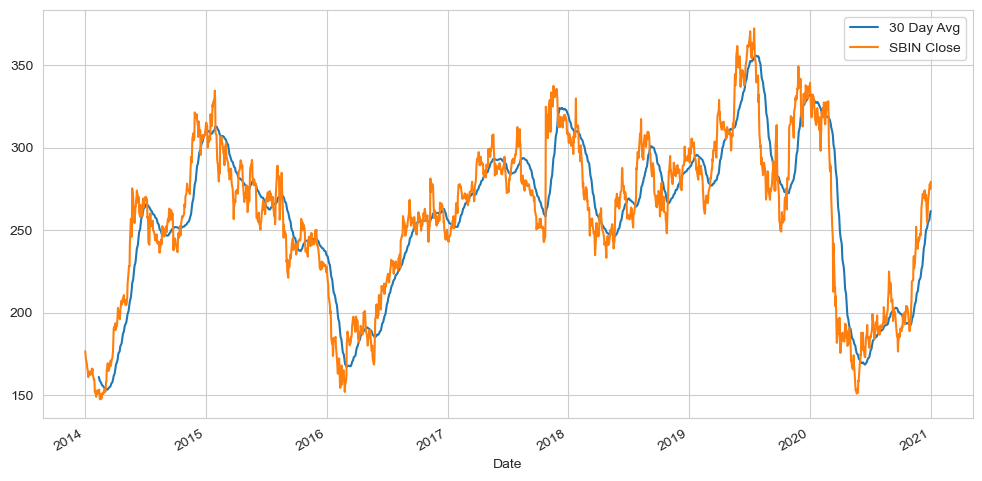

In [18]:
plt.figure(figsize=(12, 6))
bank_stocks[('SBIN', 'Close')].loc['2002-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks[('SBIN', 'Close')].loc['2002-01-01':'2021-01-01'].plot(label='SBIN Close')
plt.legend()

 # HEATMAPS

<Axes: >

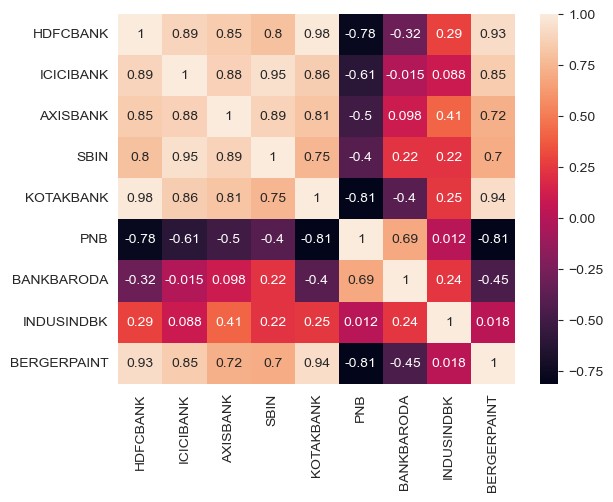

In [19]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level=1).corr(),annot=True)

# CORRELATION MATRIX

In [20]:
close_corr = bank_stocks.xs(key='Close',axis=1,level=1).corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# CLUSTER-MAP

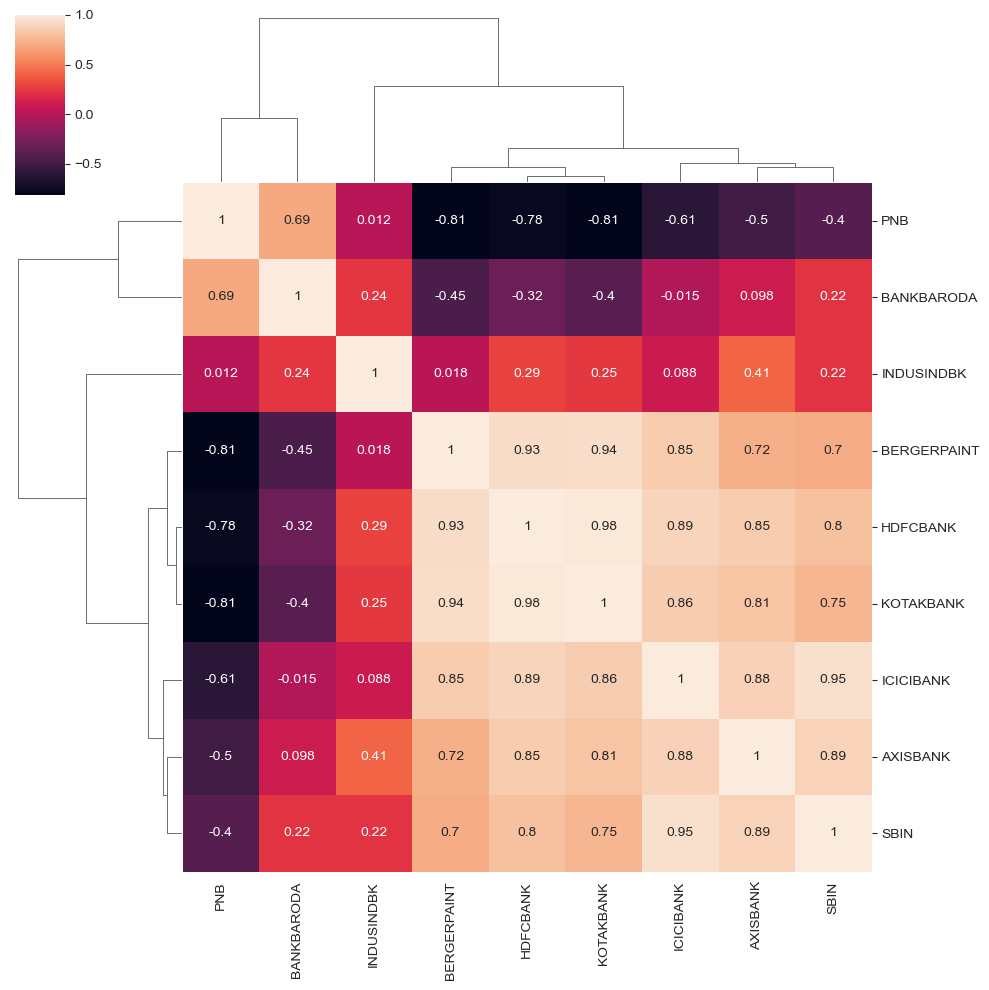

In [21]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level=1).corr(),annot=True)

# TotalRevenue, EBITDA & EBIT

In [32]:
#To find the TotalRevenue EBITDA EBIT of the stock

ticker = "BERGEPAINT.NS"
company = yf.Ticker(ticker)

#INCOME-STATEMENT
income_statement = company.get_financials()
income_s=pd.concat([income_statement])
#print(income_s)
#print(income_statement)

years = ['2021-03-31', '2022-03-31', '2023-03-31', '2024-03-31']
crore = 10000000

# Iterate over the years and calculate the total revenue
for year in years:
    total_revenue = income_s.loc['EBITDA', year] / crore
    print(f"Total EBITDA for {year[0:4]}: {total_revenue:.2f} crore")
    
print(' ')
for year in years:
    total_revenue = income_s.loc['EBIT', year] / crore
    print(f"Total EBIT for {year[0:4]}: {total_revenue:.2f} crore")


#BALANCE-SHEET
balance_sheet = company.get_balance_sheet()
#print(balance_sheet)


#ANNUAL-CASH-FLOW
cash_flow = company.get_cashflow()
#print(cash_flow)


#INCOME-STATEMENT & BALANCE-SHEET COMBINE
financials = pd.concat([income_statement, balance_sheet, cash_flow], keys=['Income Statement', 'Balance Sheet', 'Cash Flow'])
#print(financials)

Total EBITDA for 2021: 1233.86 crore
Total EBITDA for 2022: 1399.52 crore
Total EBITDA for 2023: 1525.60 crore
Total EBITDA for 2024: 1966.02 crore
 
Total EBIT for 2021: 1022.72 crore
Total EBIT for 2022: 1173.01 crore
Total EBIT for 2023: 1261.57 crore
Total EBIT for 2024: 1635.14 crore


# BAR GRAPH - TotalRevenue, EBITDA & EBIT

Total EBITDA for 2021: 1233.86 crore
Total EBITDA for 2022: 1399.52 crore
Total EBITDA for 2023: 1525.60 crore
Total EBITDA for 2024: 1966.02 crore


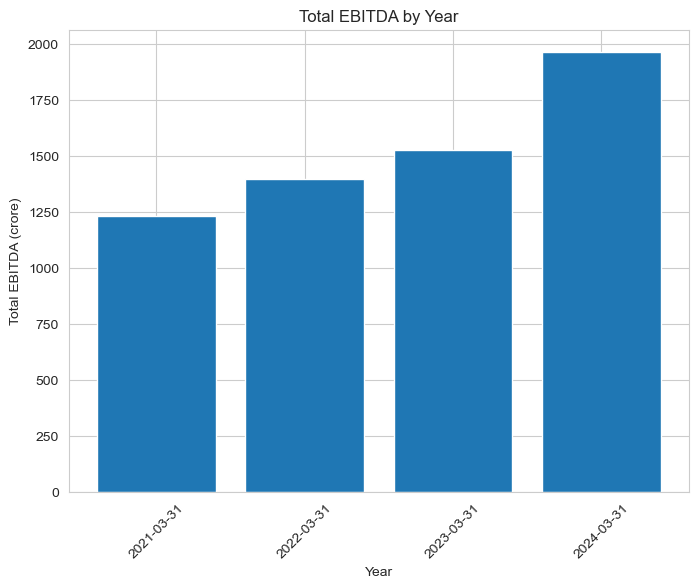

Total EBIT for 2021: 1022.72 crore
Total EBIT for 2022: 1173.01 crore
Total EBIT for 2023: 1261.57 crore
Total EBIT for 2024: 1635.14 crore


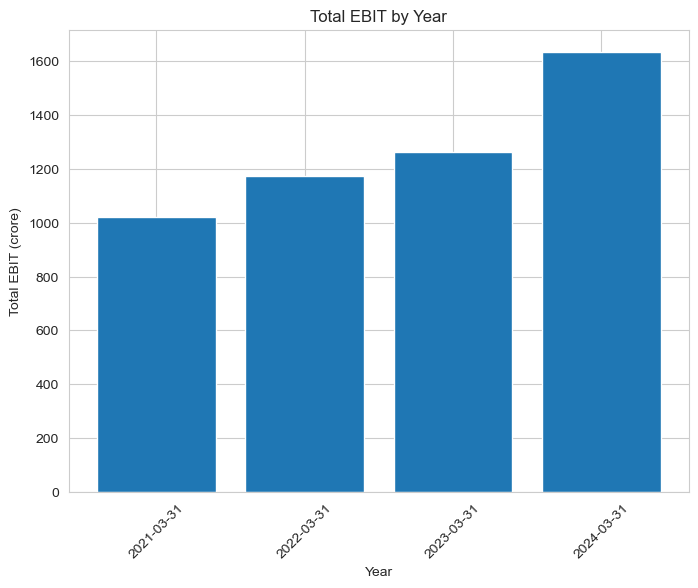

Total TotalRevenue for 2021: 6736.88 crore
Total TotalRevenue for 2022: 8655.77 crore
Total TotalRevenue for 2023: 10567.84 crore
Total TotalRevenue for 2024: 11198.92 crore


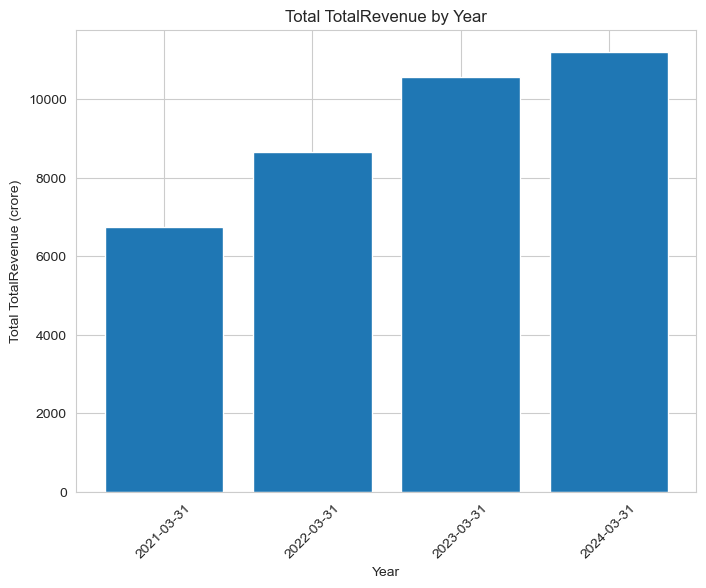

In [25]:
#To find the TotalRevenue EBITDA EBIT of the stock & Plot Graph

ticker = "BERGEPAINT.NS"
company = yf.Ticker(ticker)

# Get the latest annual income statement
income_s = pd.concat([company.get_financials()])


years = ['2021-03-31', '2022-03-31', '2023-03-31', '2024-03-31']
crore = 10000000
parameters = ['EBITDA', 'EBIT', 'TotalRevenue']

# Iterate over the parameters
for para_name in parameters:
    # Create a list to store the values
    values = []

    # Iterate over the years and calculate the values
    for year in years:
        value = income_s.loc[para_name, year] / crore
        values.append(value)
        print(f"Total {para_name} for {year[0:4]}: {value:.2f} crore")

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the bar plot
    ax.bar(years, values)

    # Add labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Total {para_name} (crore)')
    ax.set_title(f'Total {para_name} by Year')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.show()

# TotalRevenue COMPARISION

Total Revenue of HDFCBANK.NS for 2021: 93666.22 crore
Total Revenue of KOTAKBANK.NS for 2021: 42614.25 crore 

Total Revenue of HDFCBANK.NS for 2022: 101941.37 crore
Total Revenue of KOTAKBANK.NS for 2022: 45972.35 crore 

Total Revenue of HDFCBANK.NS for 2023: 120537.50 crore
Total Revenue of KOTAKBANK.NS for 2023: 53730.90 crore 



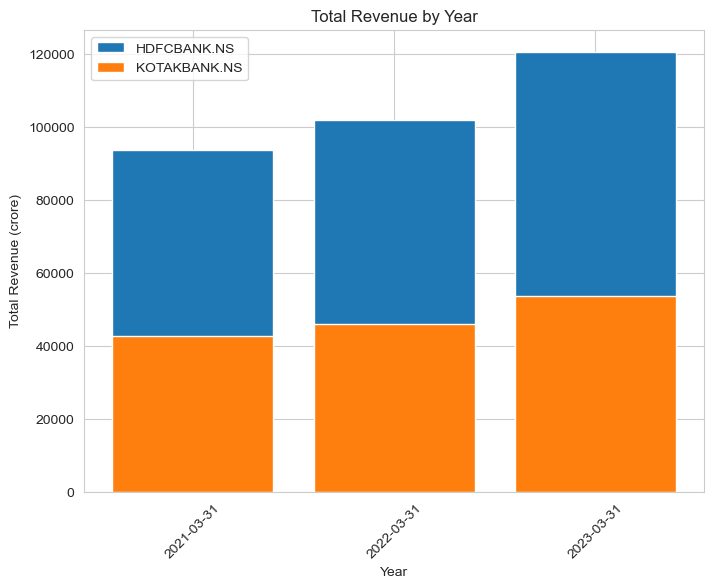

In [28]:
#Total Revenue Comparision

ticker2 = "KOTAKBANK.NS"
ticker1 = "HDFCBANK.NS"

# Download the company data
company1 = yf.Ticker(ticker1)
company2 = yf.Ticker(ticker2)

# Get the latest annual income statements
income_statement1 = company1.get_financials()
income_statement2 = company2.get_financials()

# Concatenate the income statements
income_s1 = pd.concat([income_statement1])
income_s2 = pd.concat([income_statement2])

# Define the years
years = ['2021-03-31', '2022-03-31', '2023-03-31']

# Define the conversion factor (crore)
crore = 10000000

# Create lists to store the total revenue values
total_revenues1 = []
total_revenues2 = []

# Iterate over the years and calculate the total revenue
for year in years:
    total_revenue1 = income_s1.loc['TotalRevenue', year] / crore
    total_revenue2 = income_s2.loc['TotalRevenue', year] / crore
    total_revenues1.append(total_revenue1)
    total_revenues2.append(total_revenue2)
    print(f"Total Revenue of {ticker1} for {year[0:4]}: {total_revenue1:.2f} crore")
    print(f"Total Revenue of {ticker2} for {year[0:4]}: {total_revenue2:.2f} crore \n")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot
ax.bar(years, total_revenues1, label=ticker1)
ax.bar(years, total_revenues2, label=ticker2)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Revenue (crore)')
ax.set_title('Total Revenue by Year')

# Add legend
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()